C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_1.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_10.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_11.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_12.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_13.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_14.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_15.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_16.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_17.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_18.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_19.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_2.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_20.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_21.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_22.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_23.csv
C:\Users\bamid\Desktop\Phd

C:\Users\bamid\AppData\Local\Temp/ipykernel_7528/1565004201.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_29.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_3.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_30.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_31.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_32.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_33.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_34.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_35.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_36.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_37.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_38.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_39.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_4.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_40.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_41.csv
C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output\df_42.csv
C:\Users\bamid\Desktop\Phd

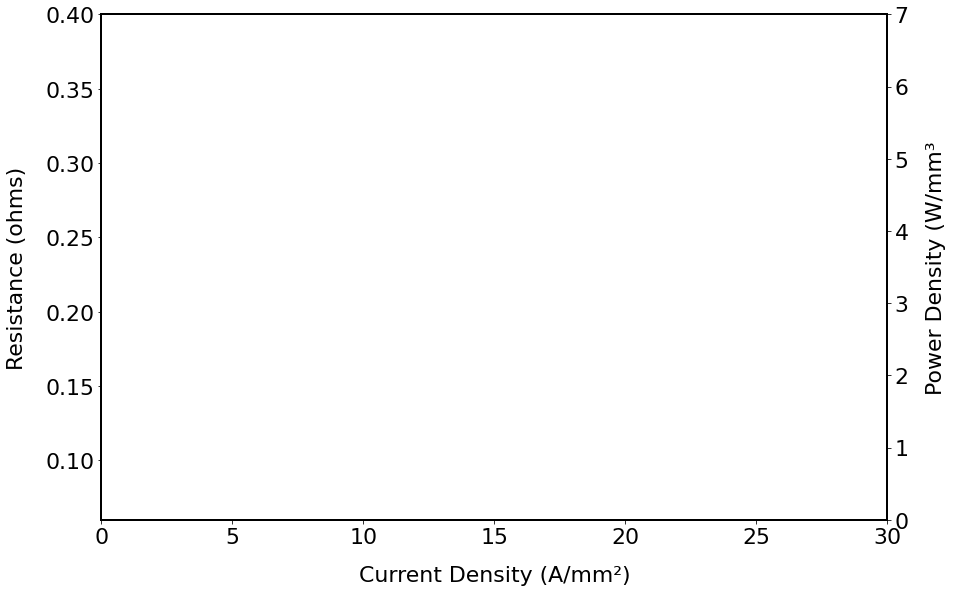

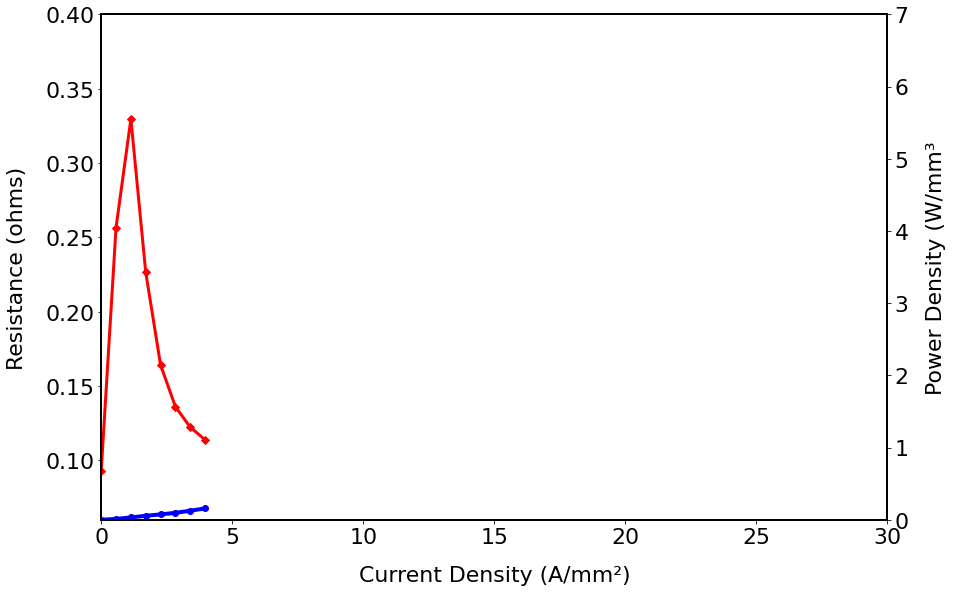

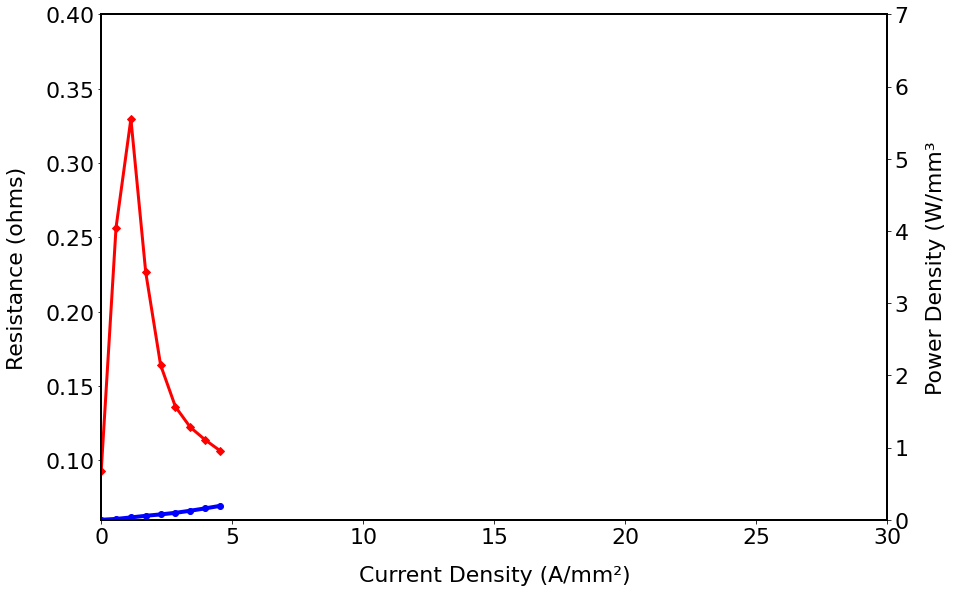

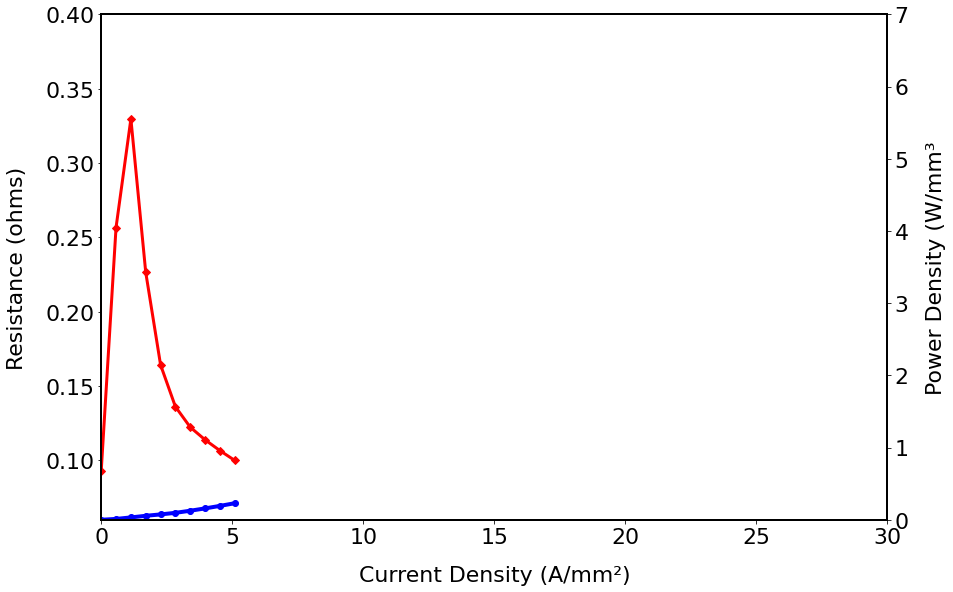

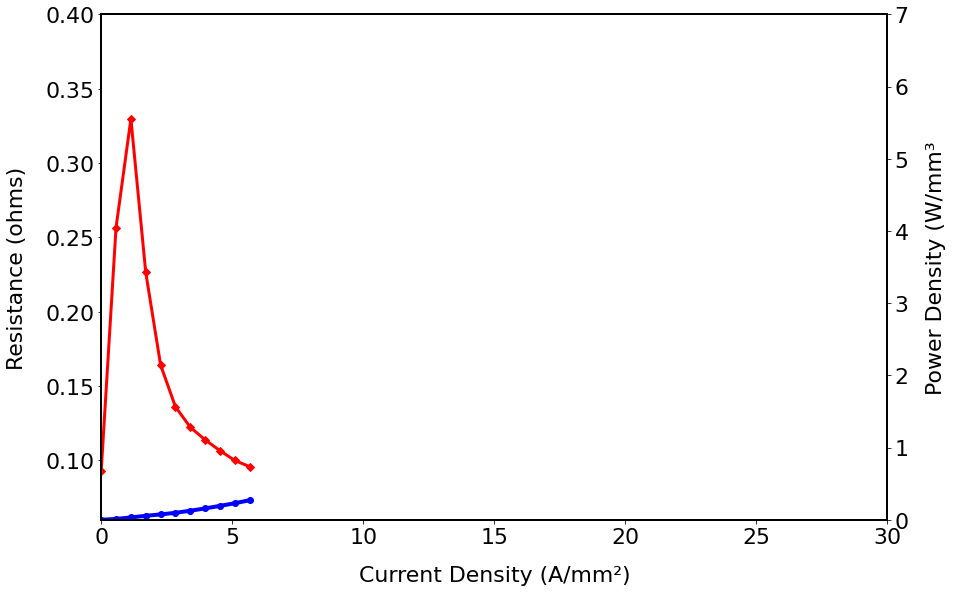

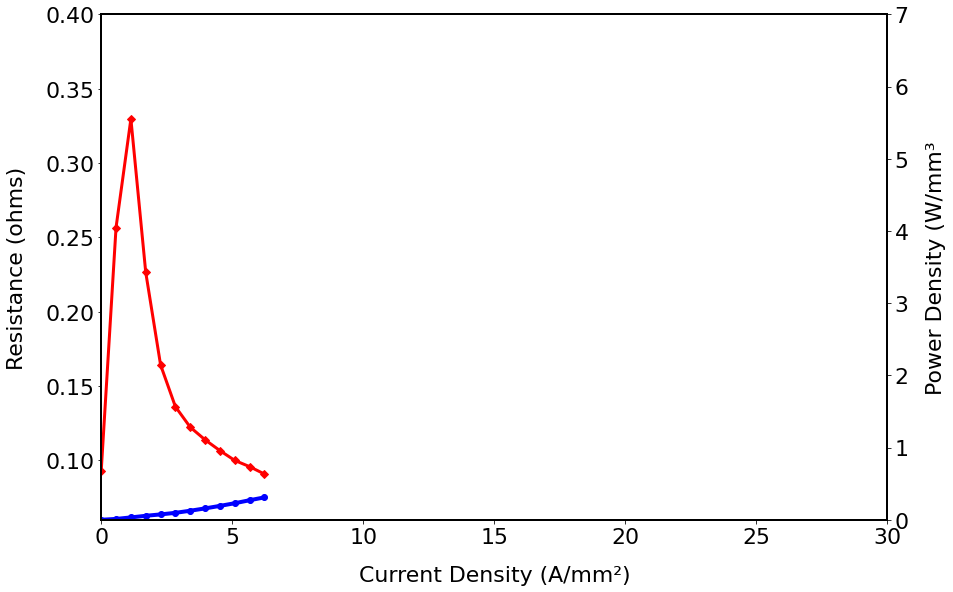

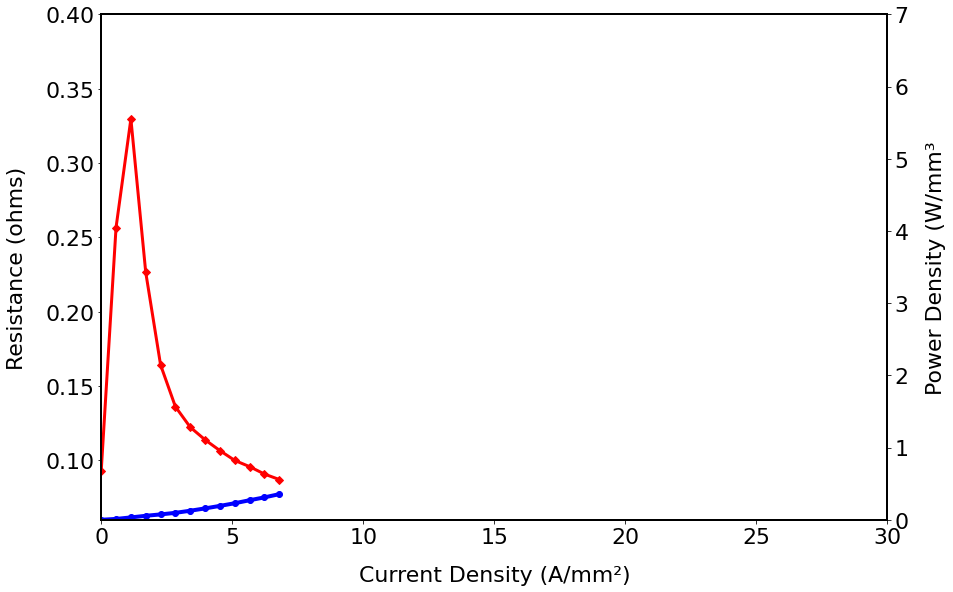

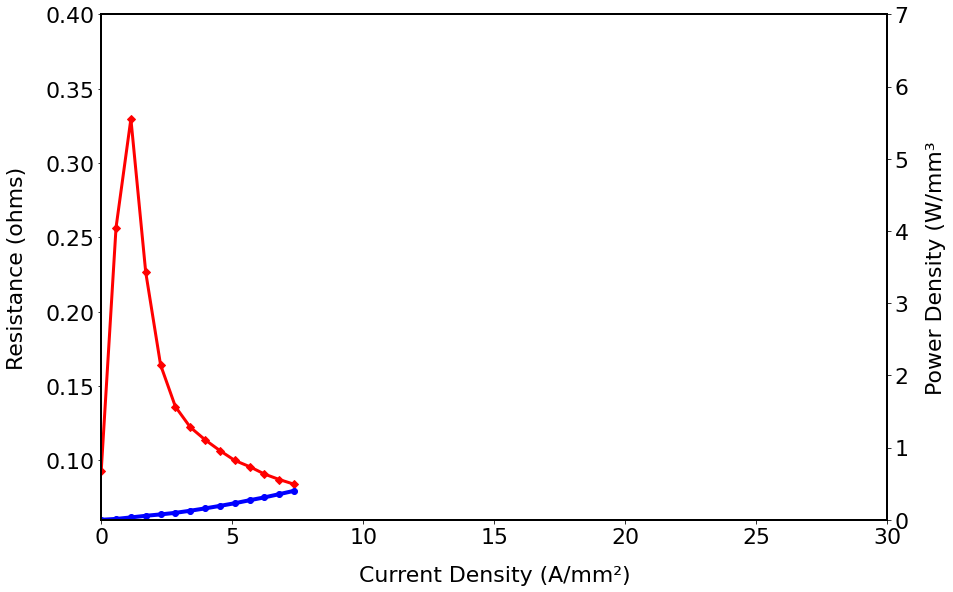

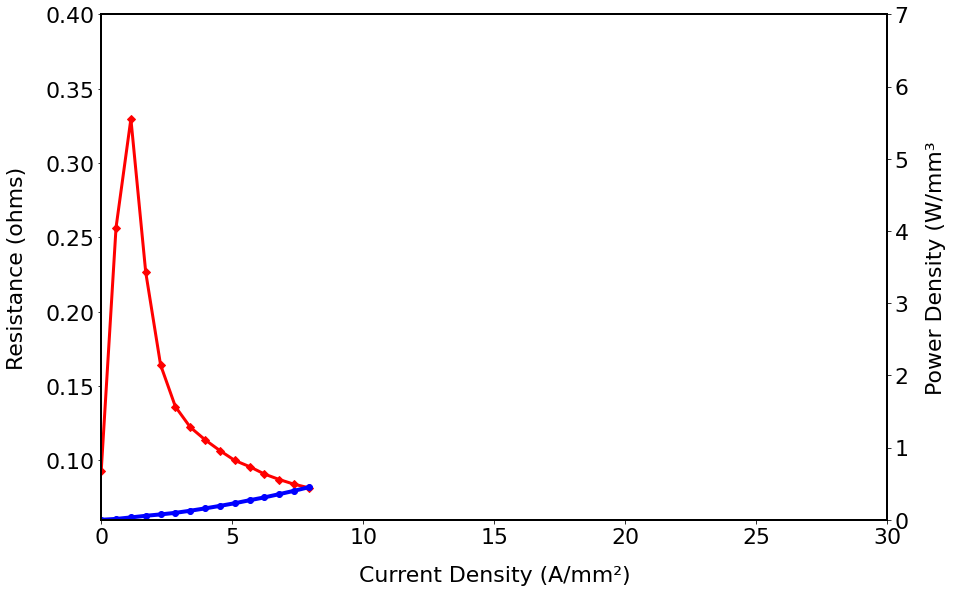

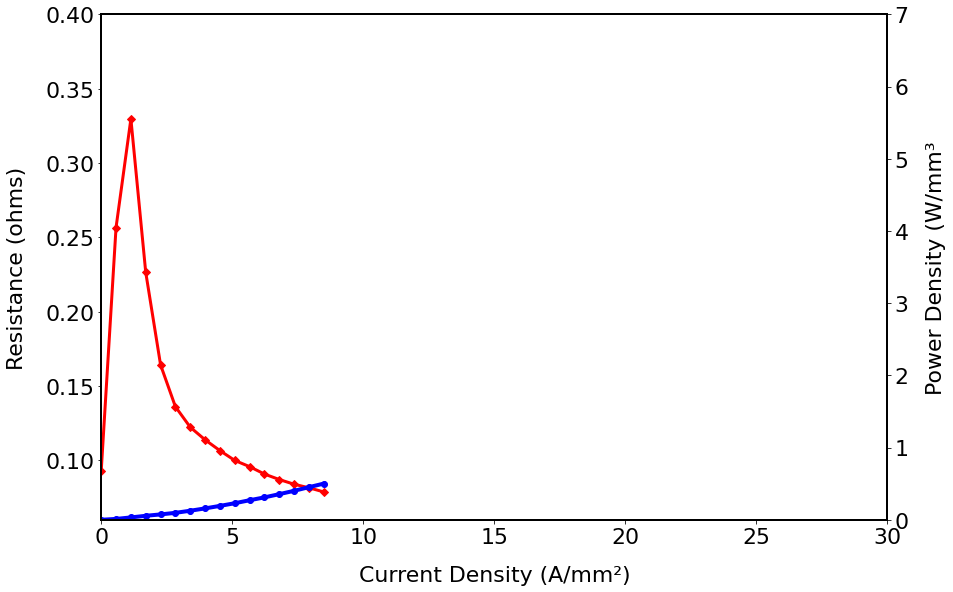

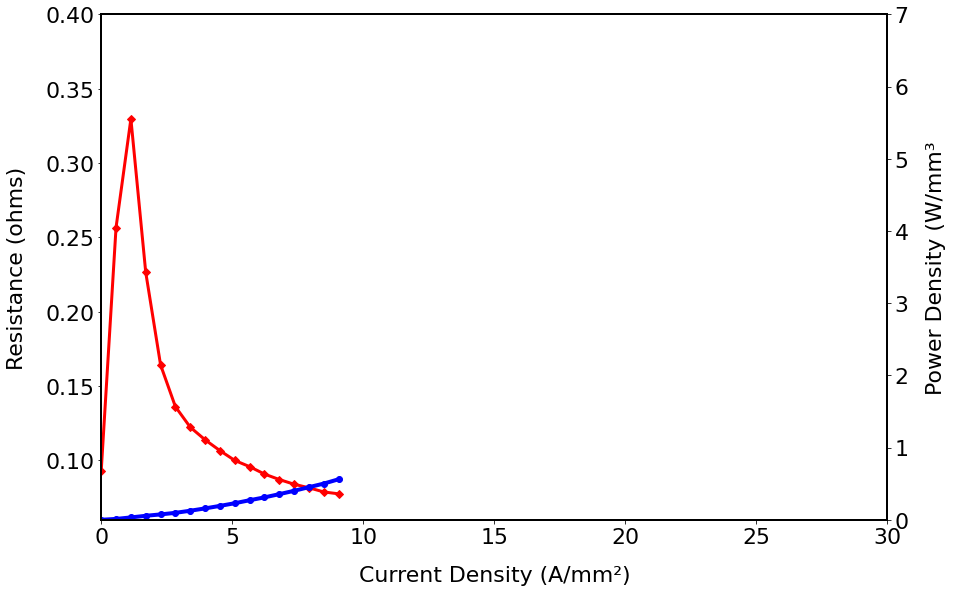

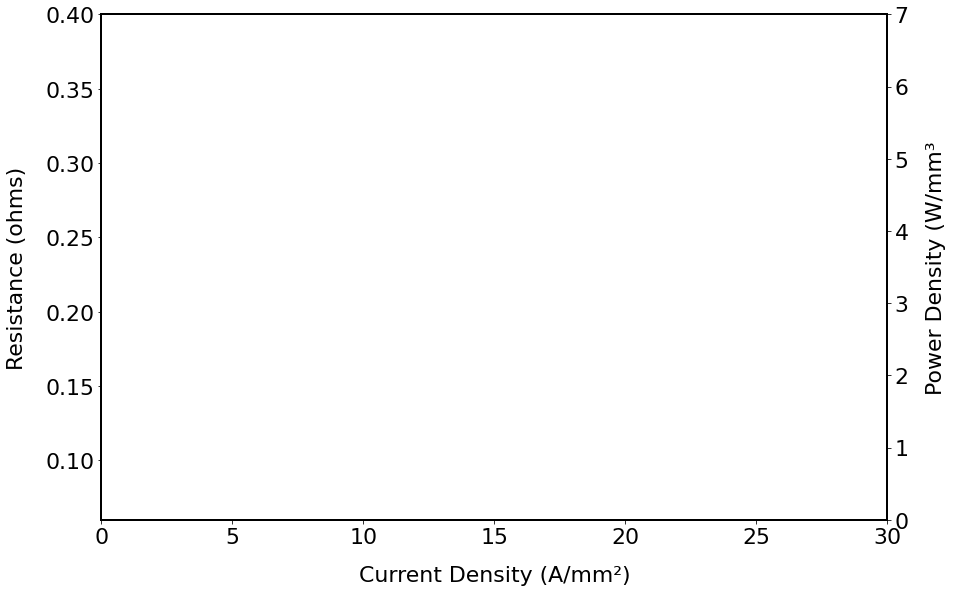

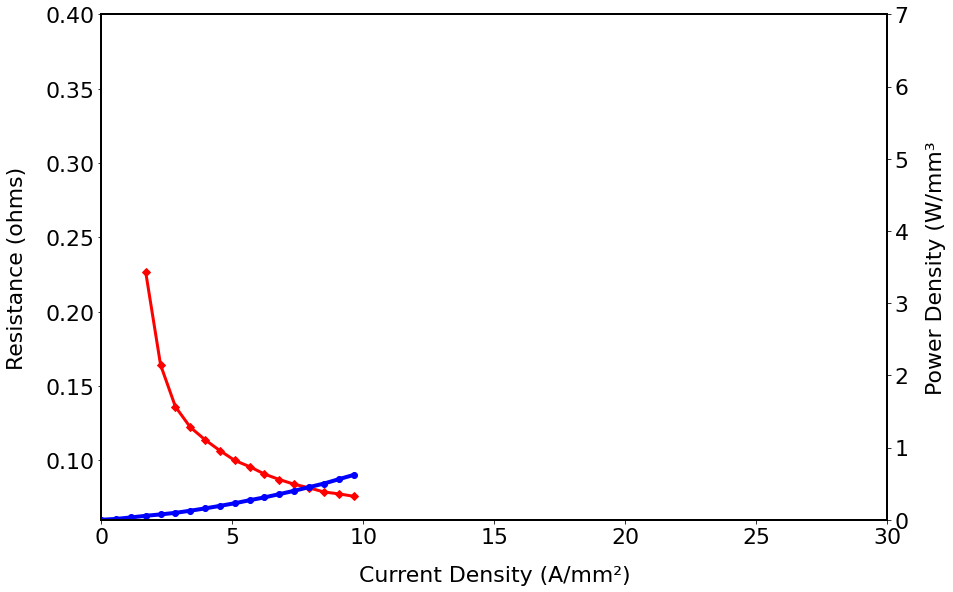

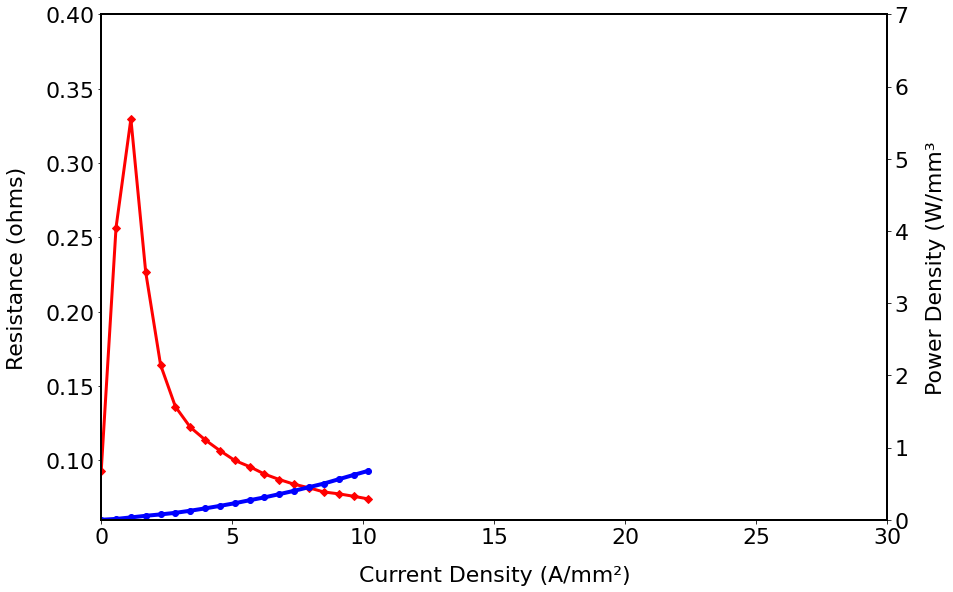

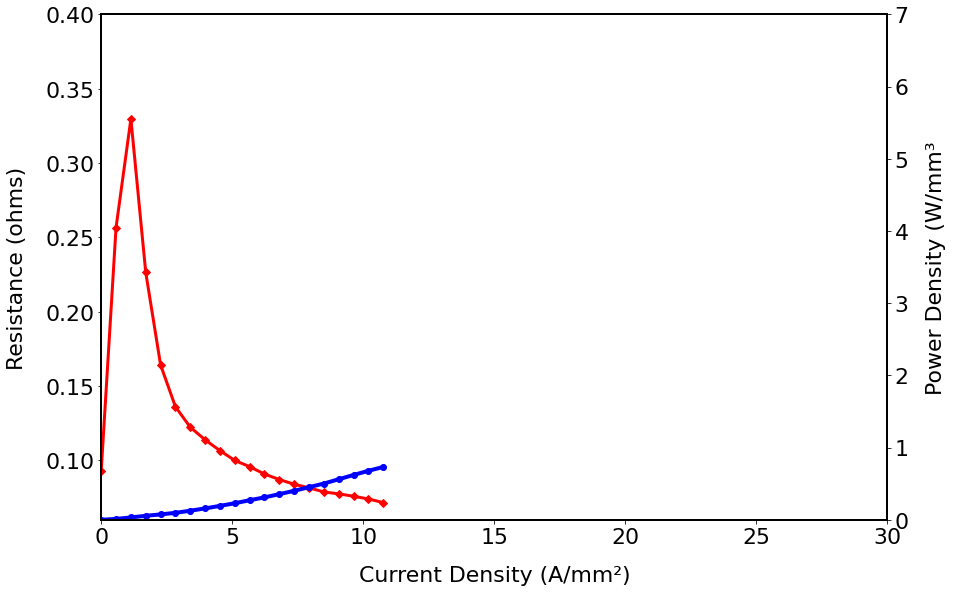

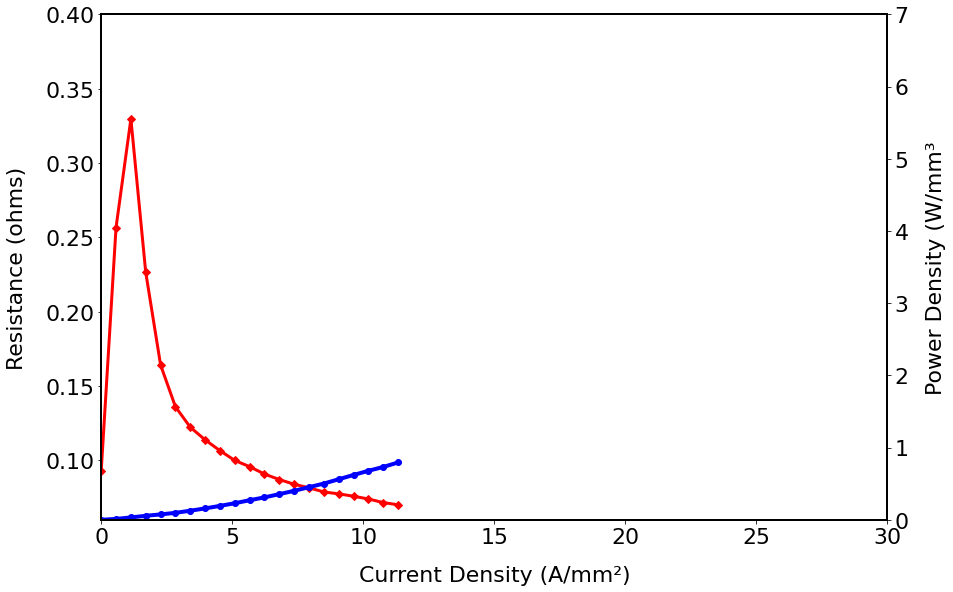

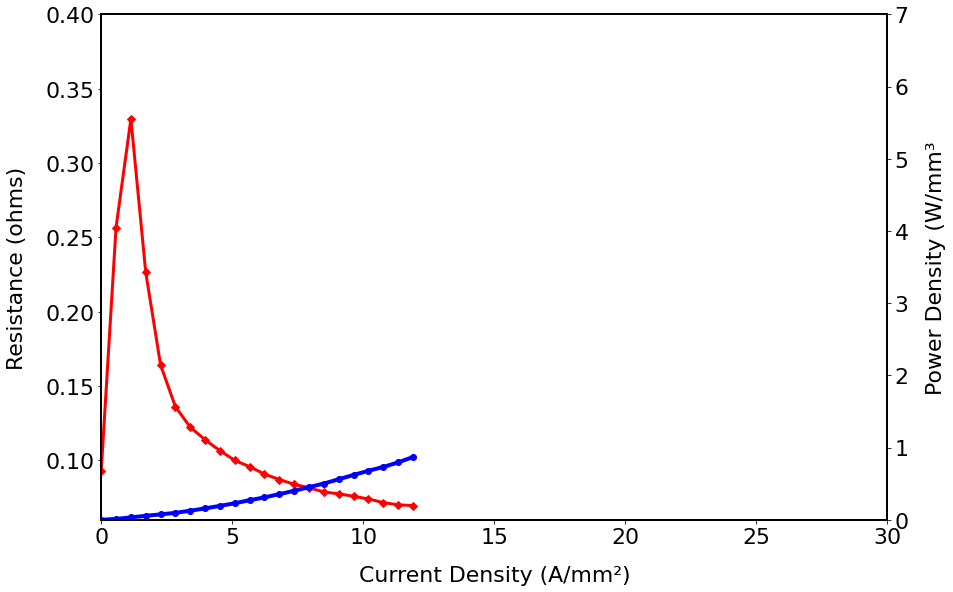

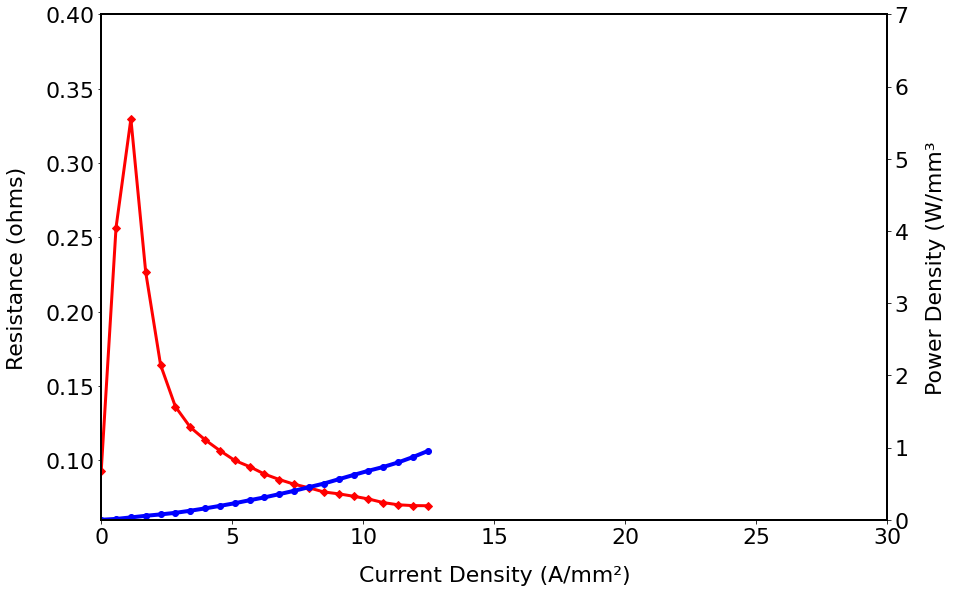

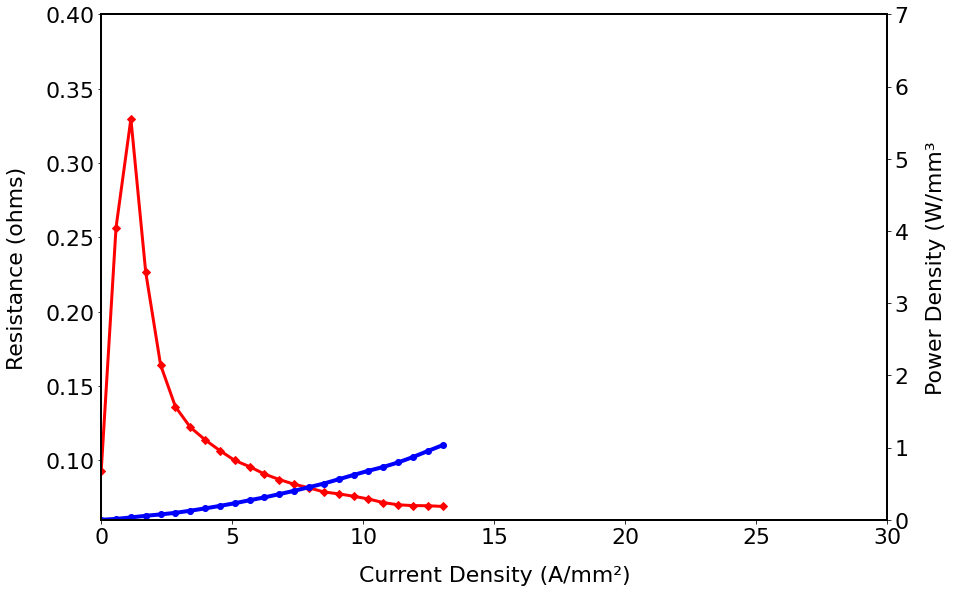

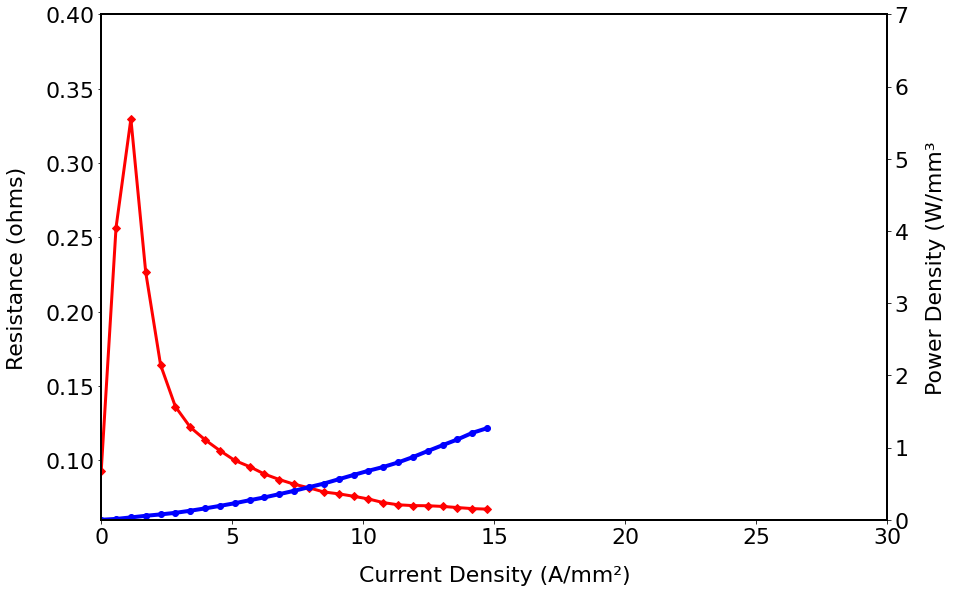

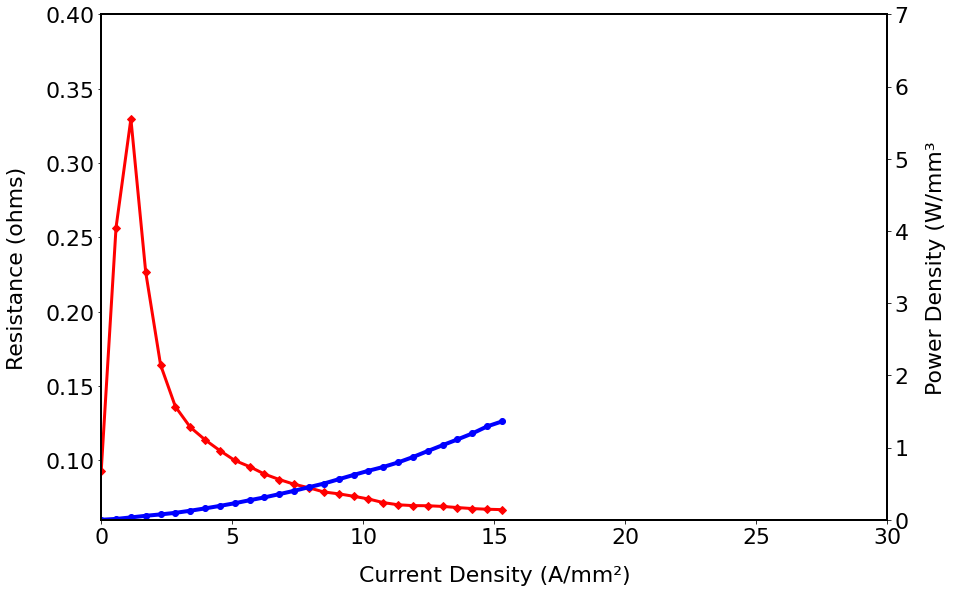

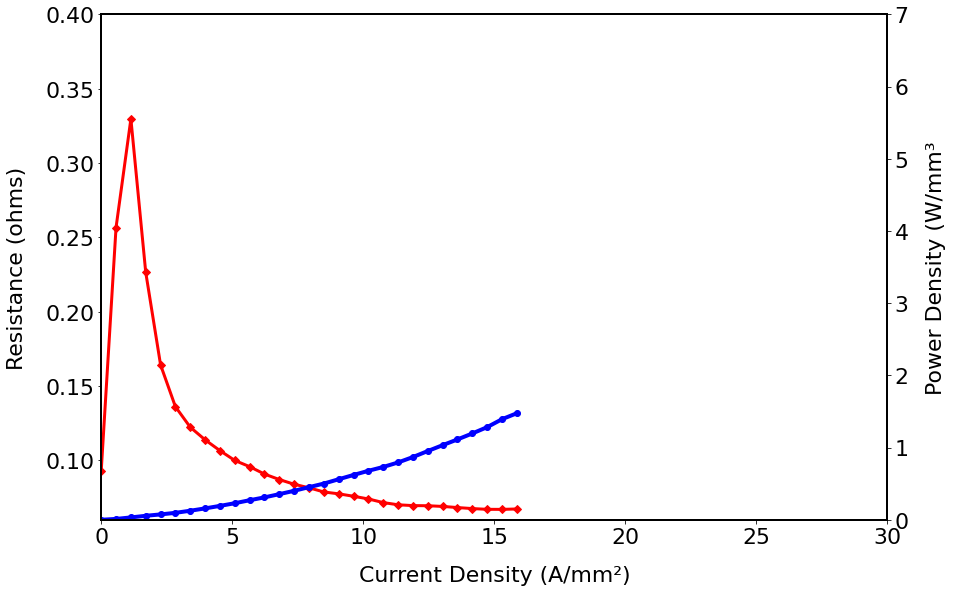

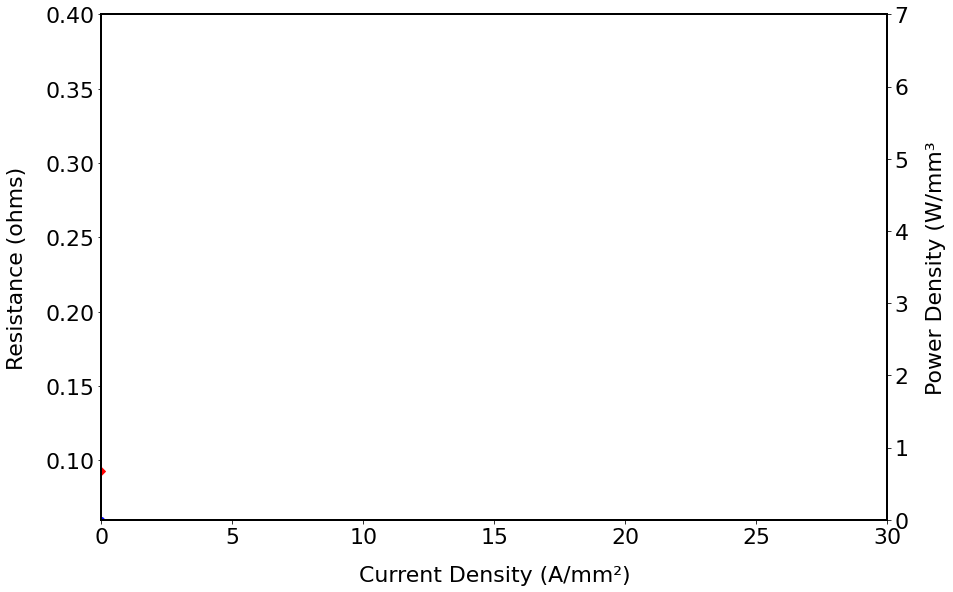

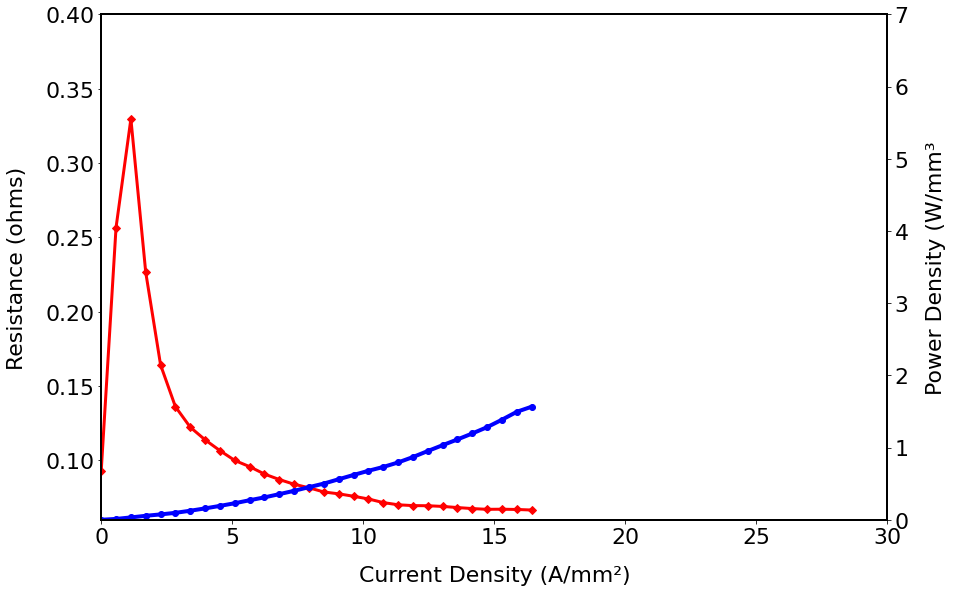

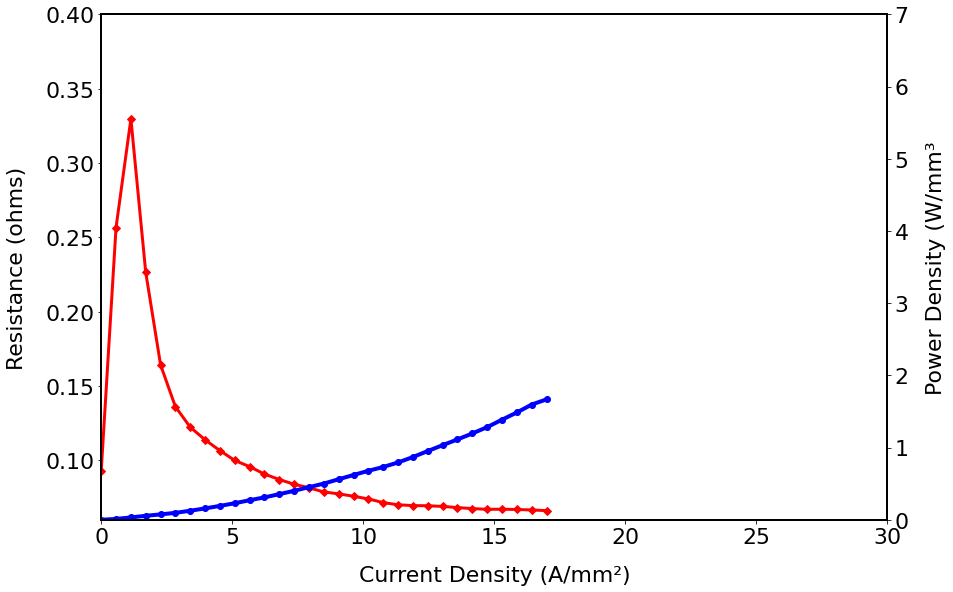

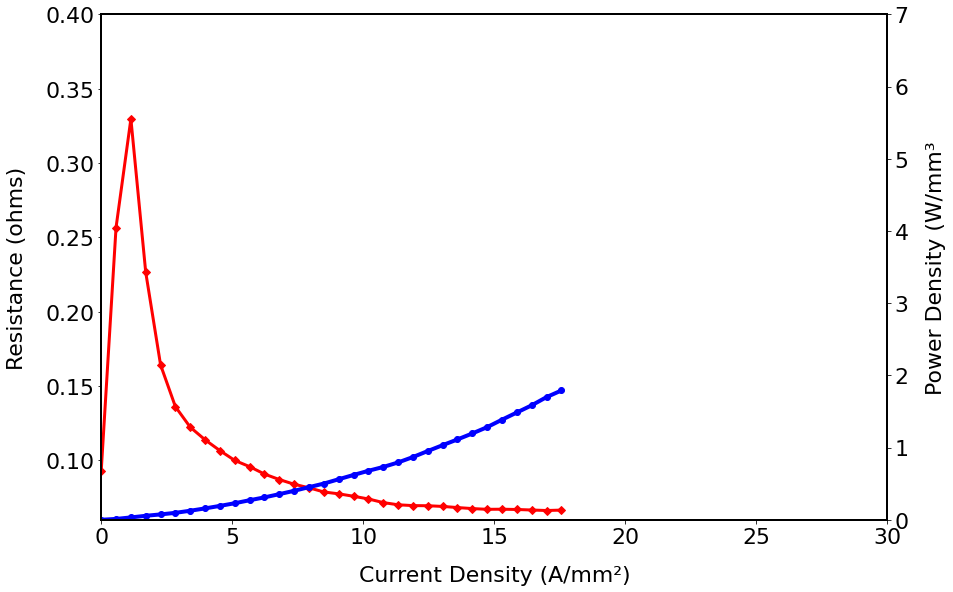

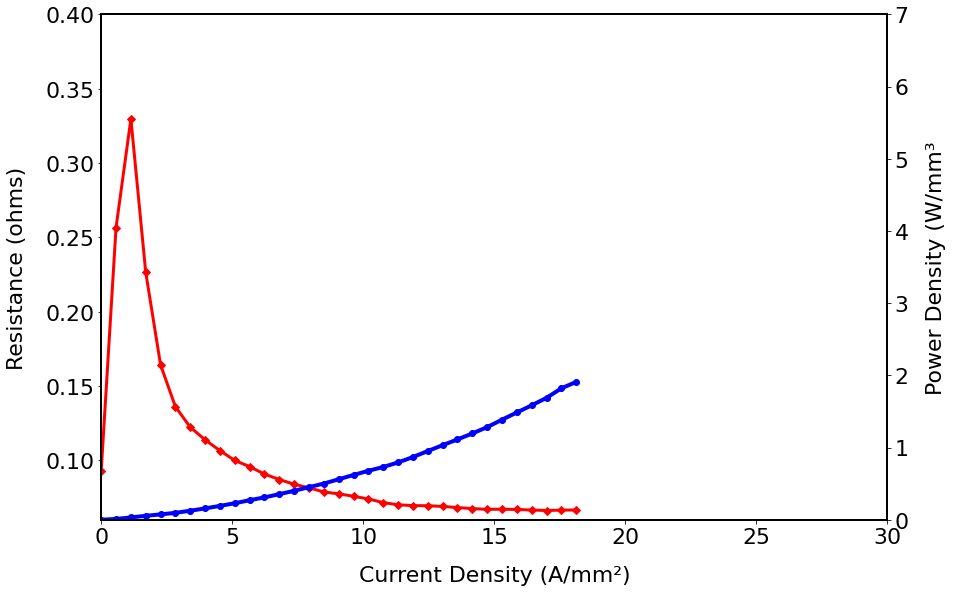

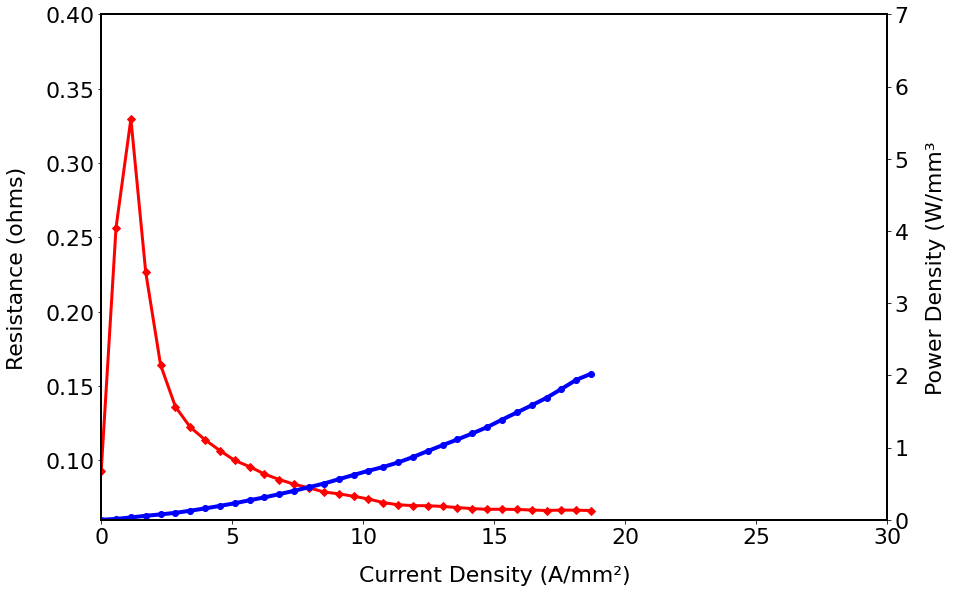

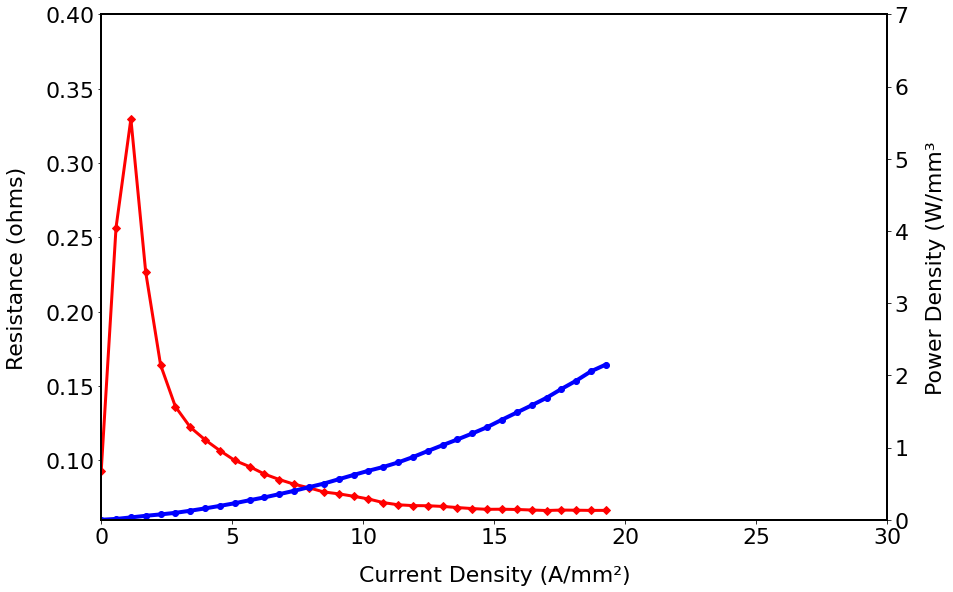

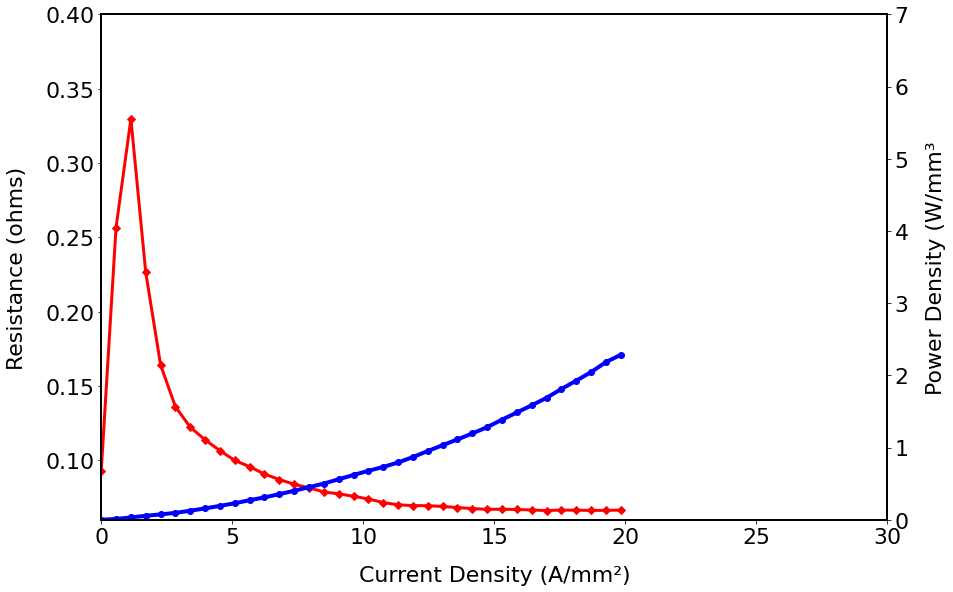

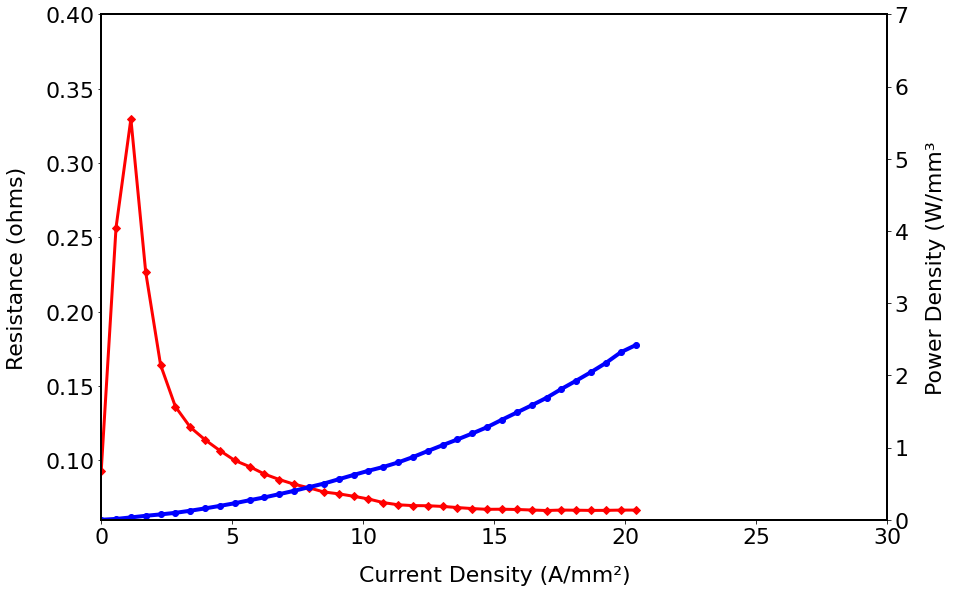

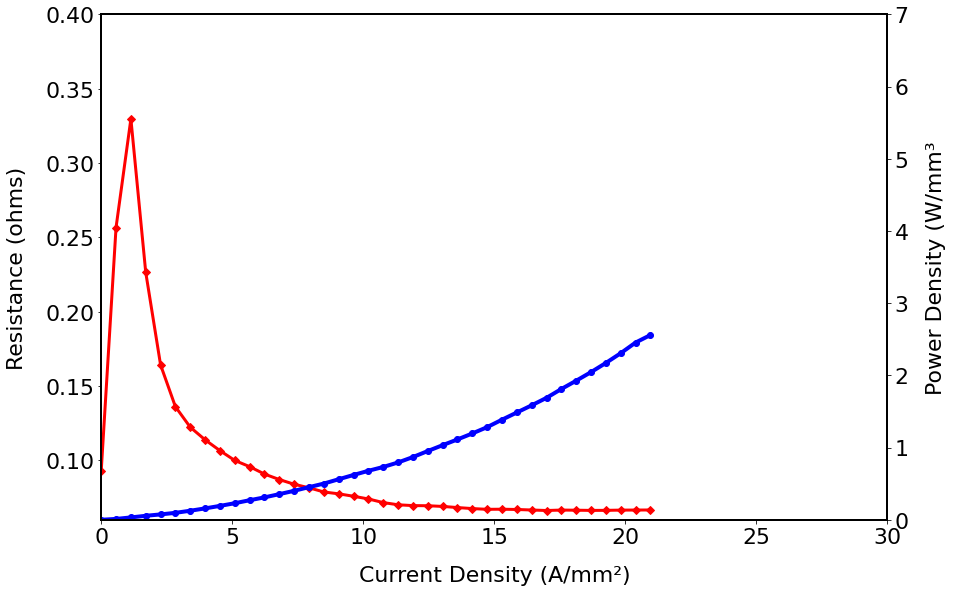

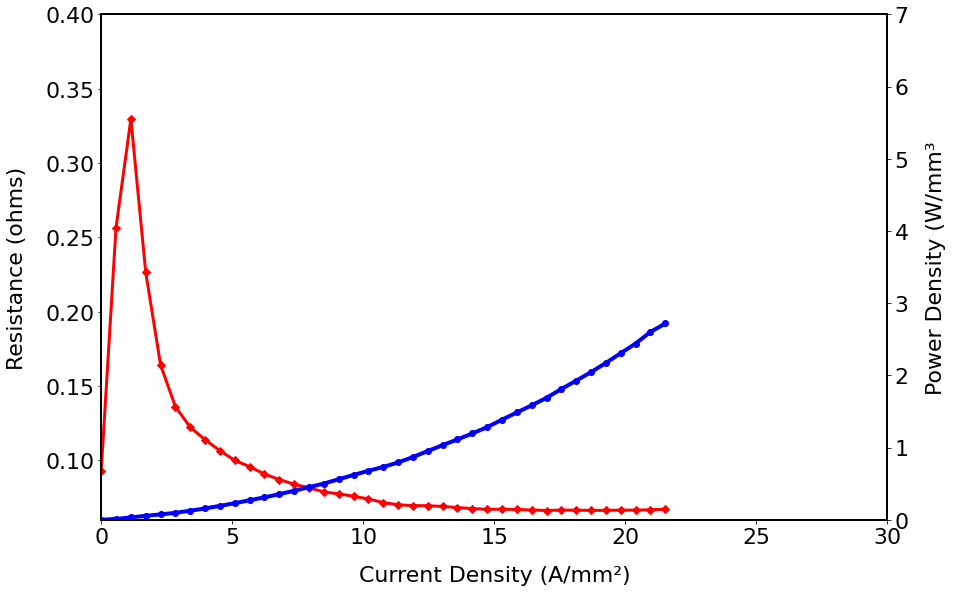

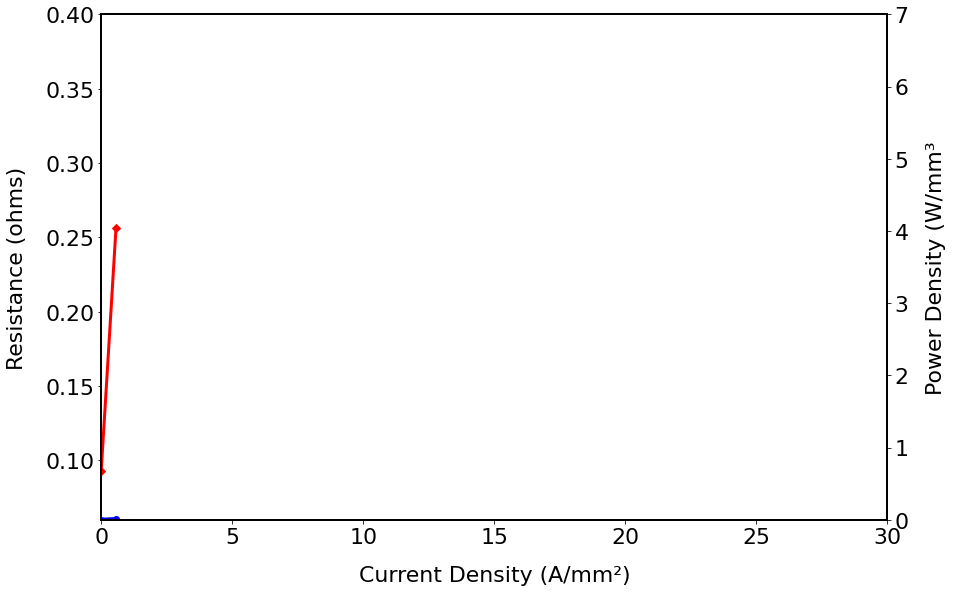

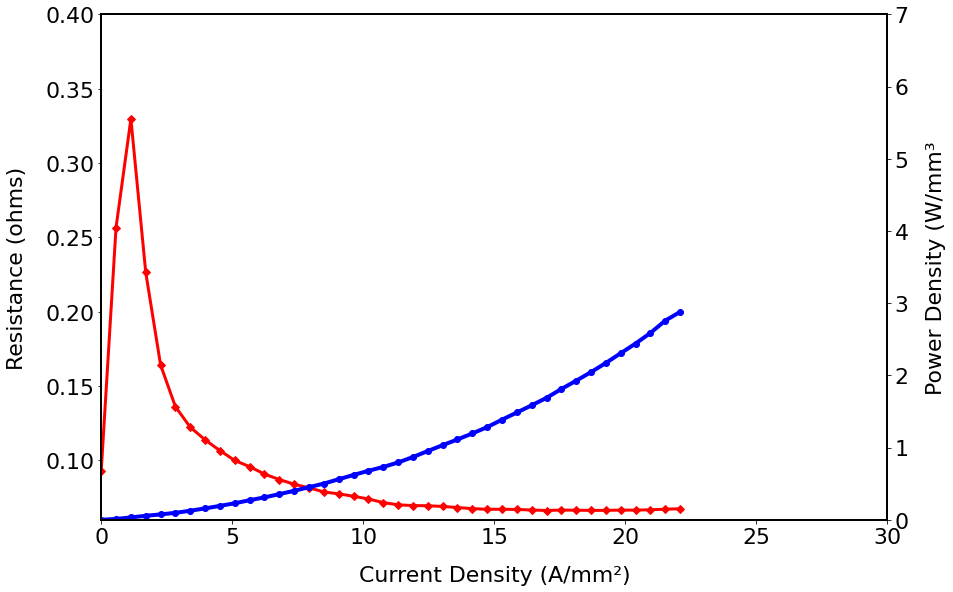

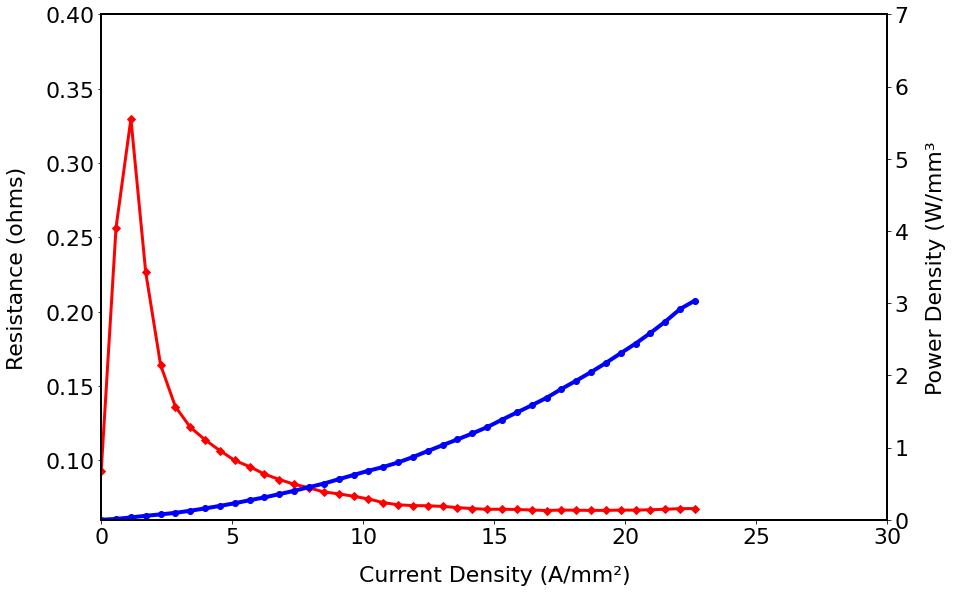

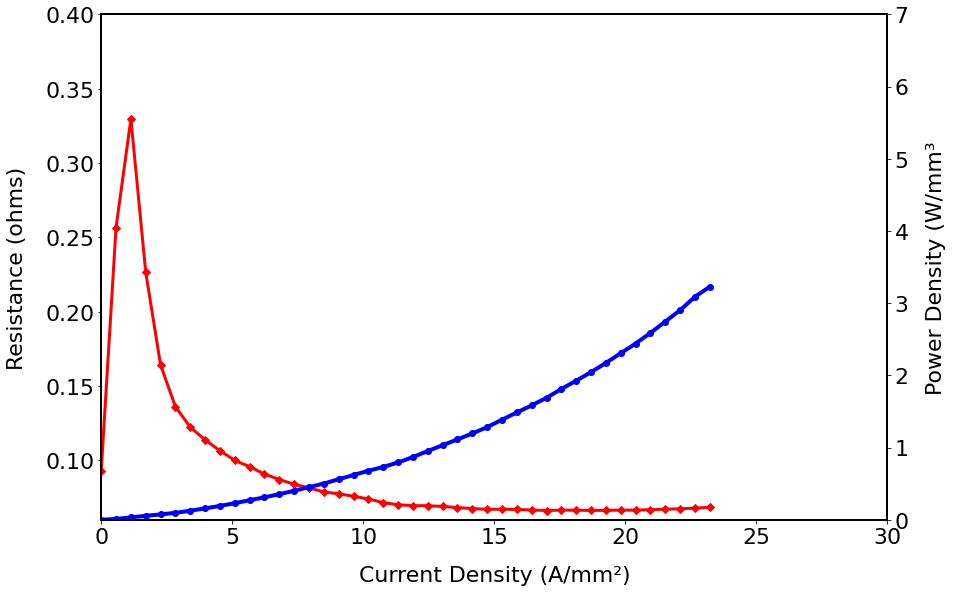

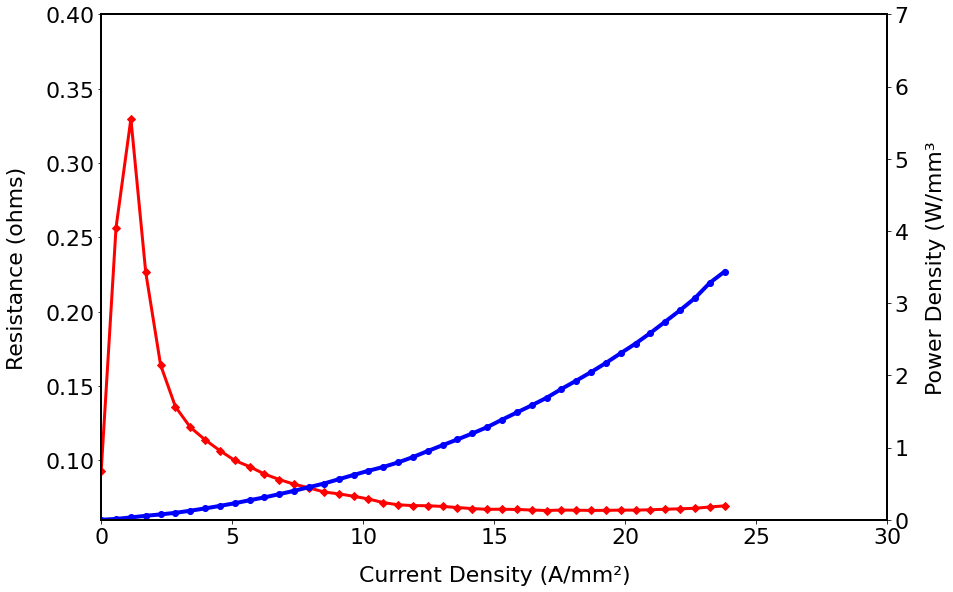

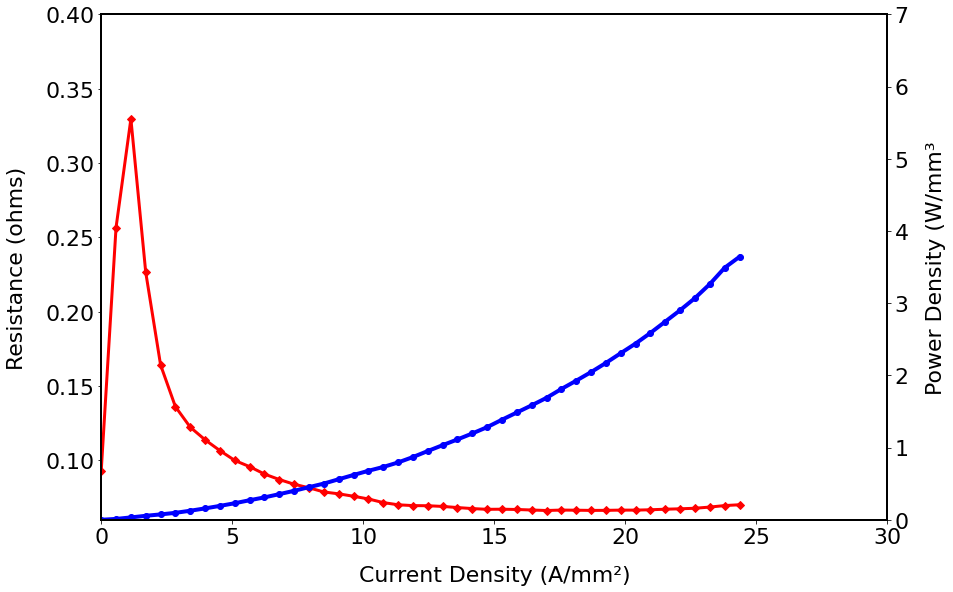

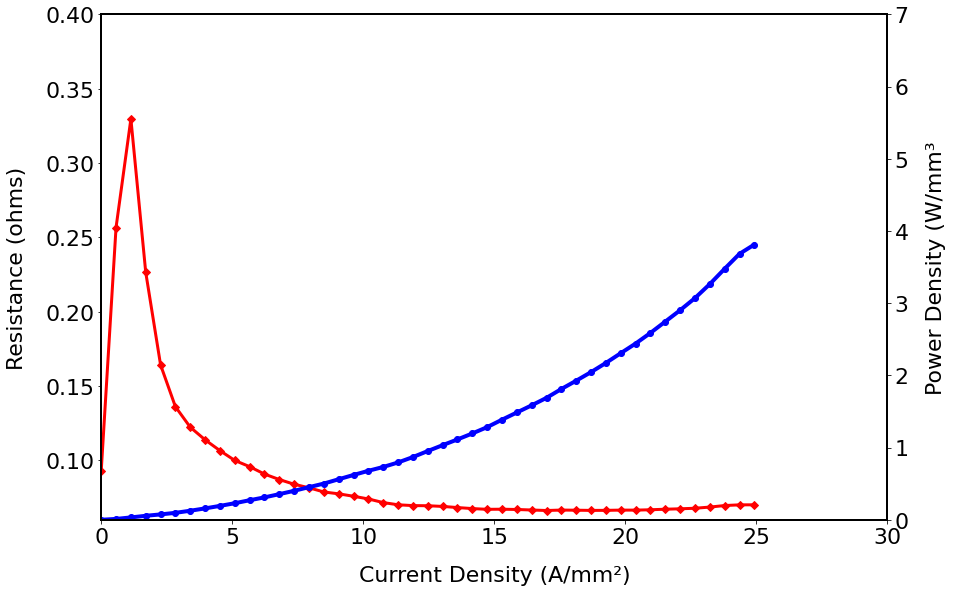

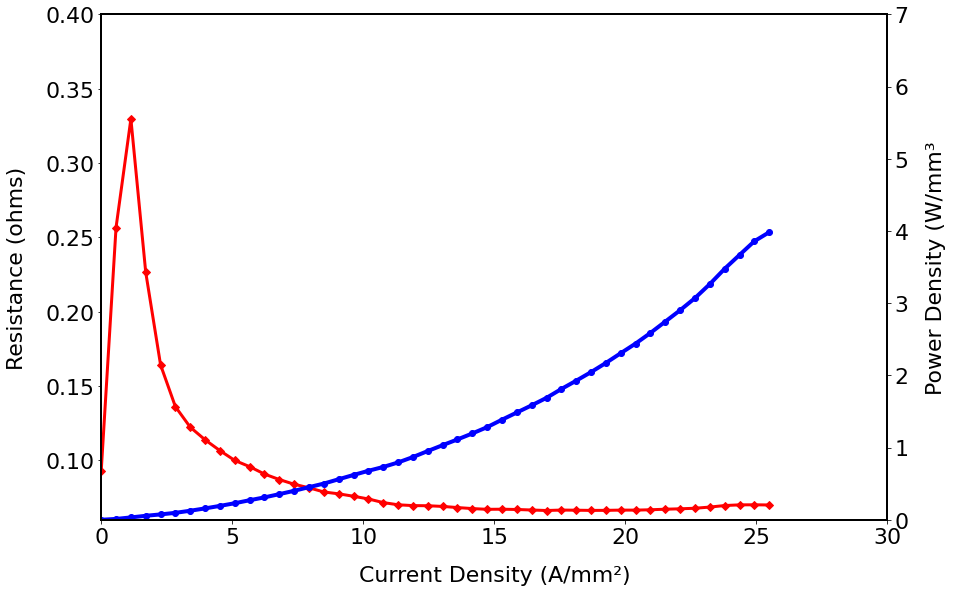

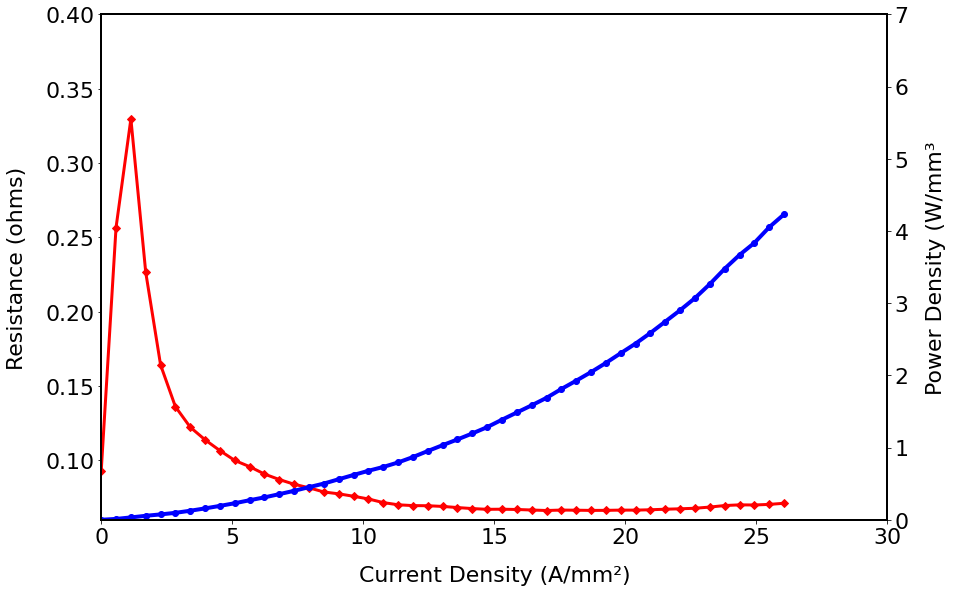

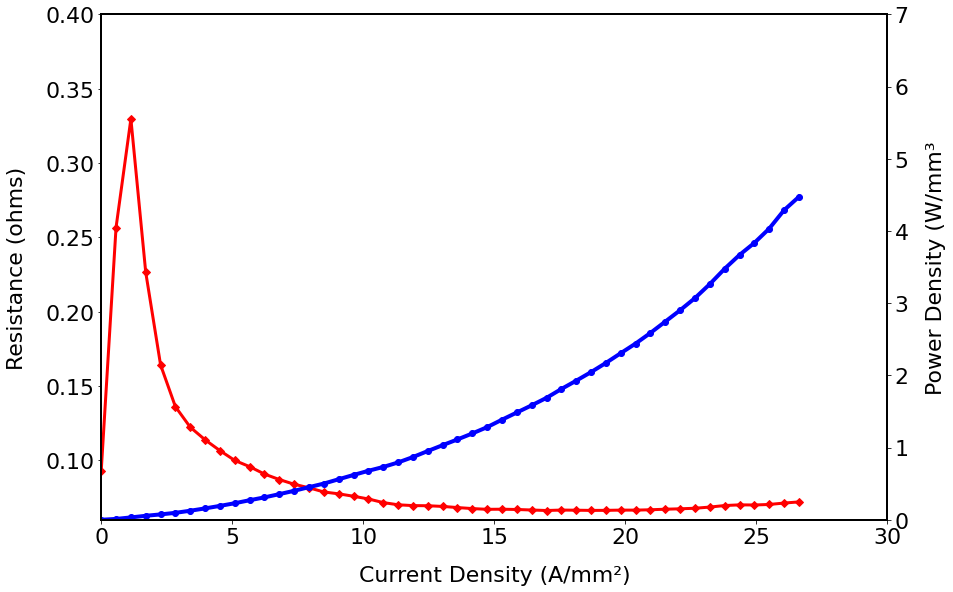

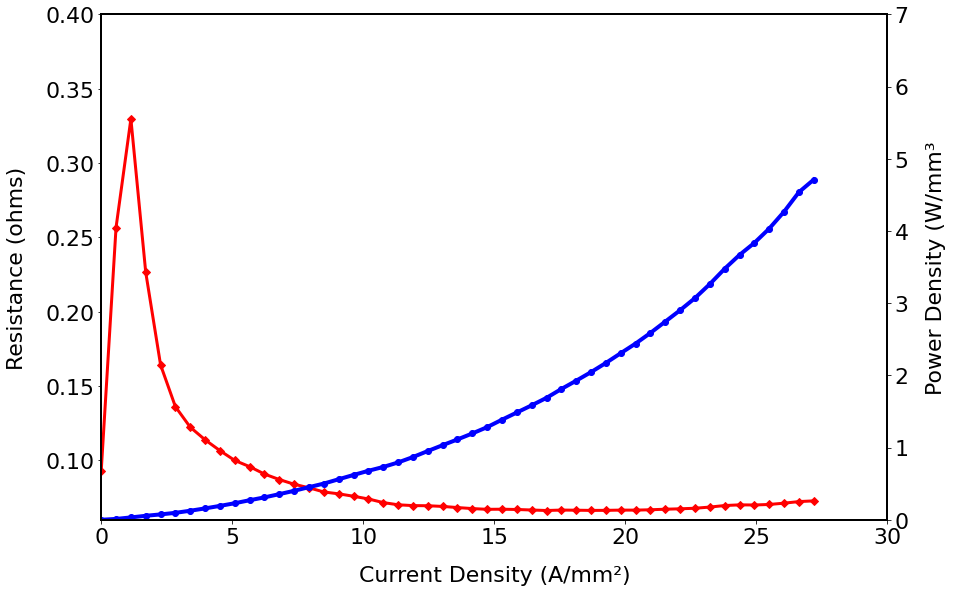

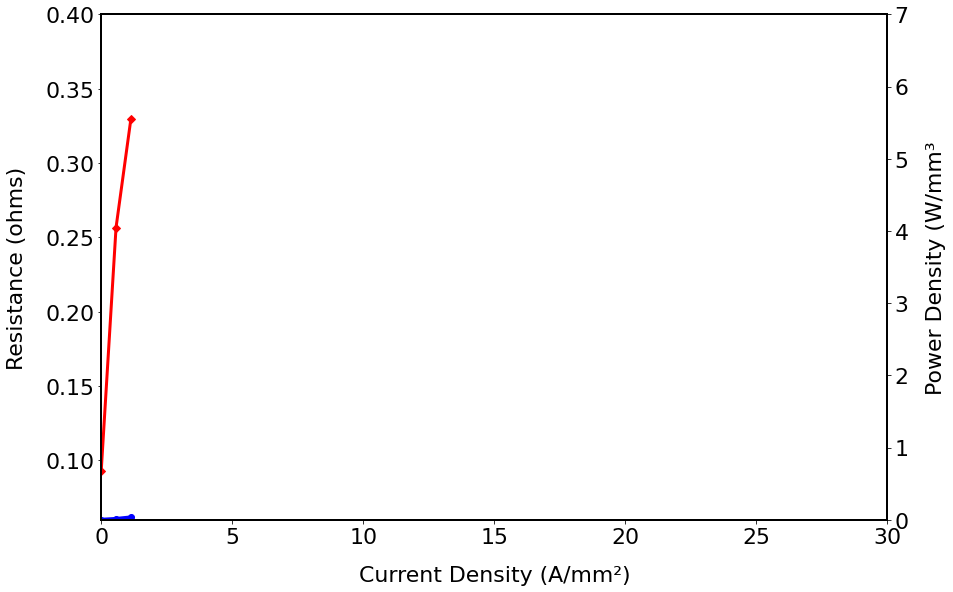

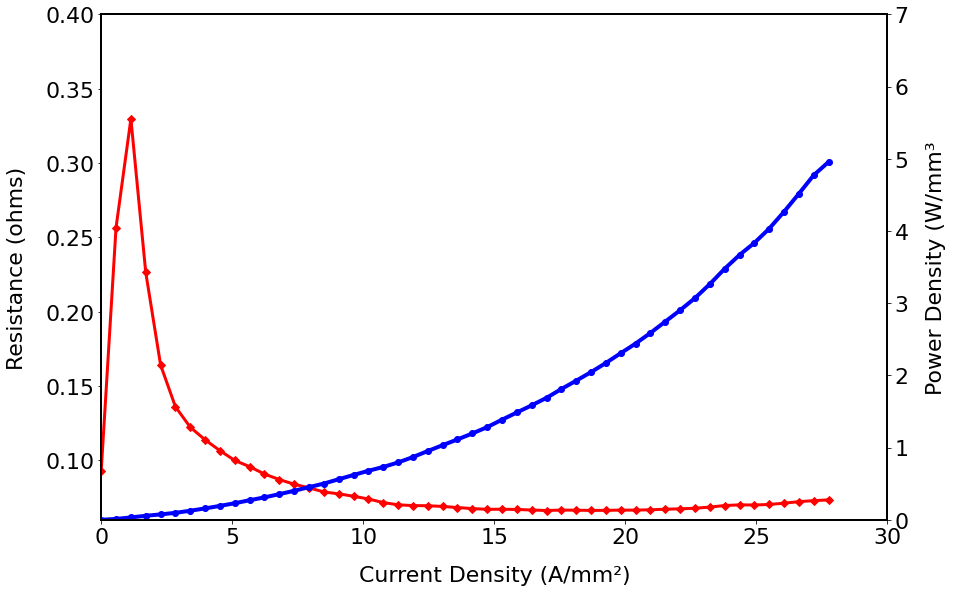

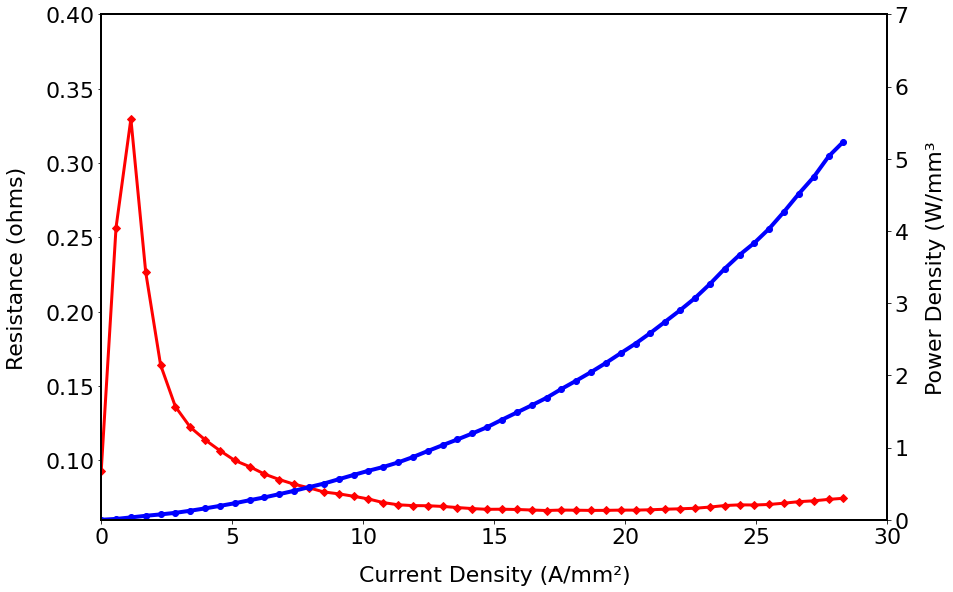

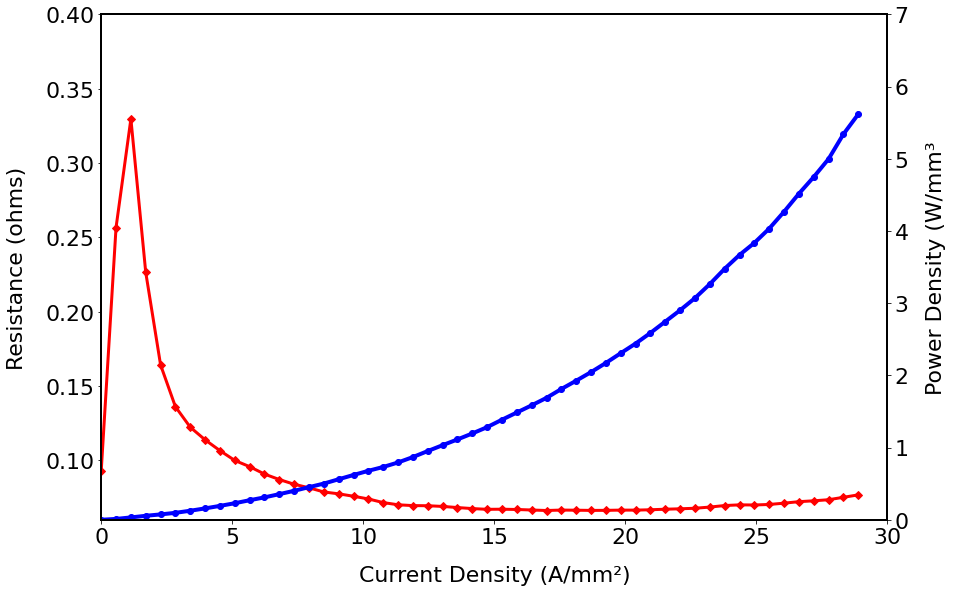

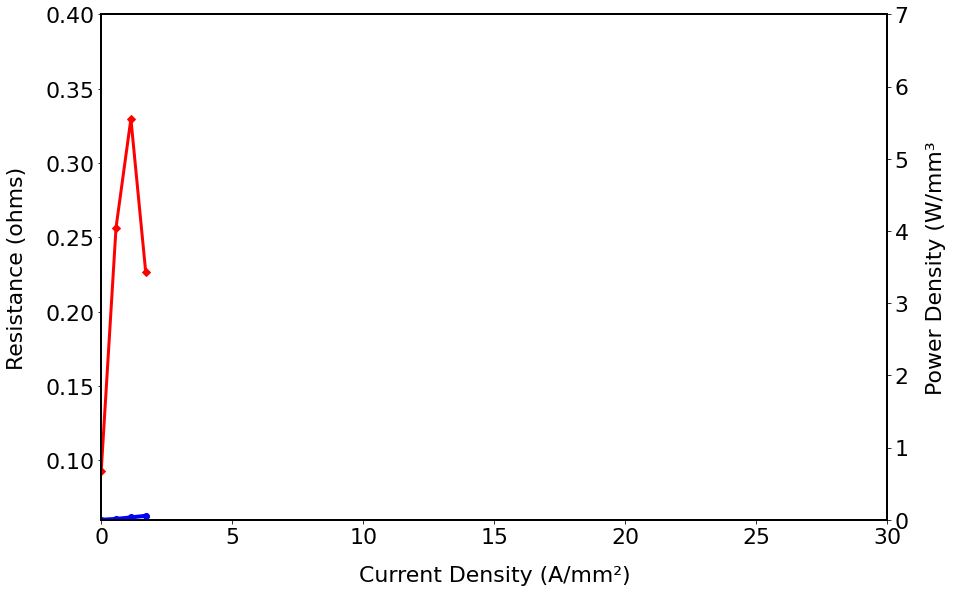

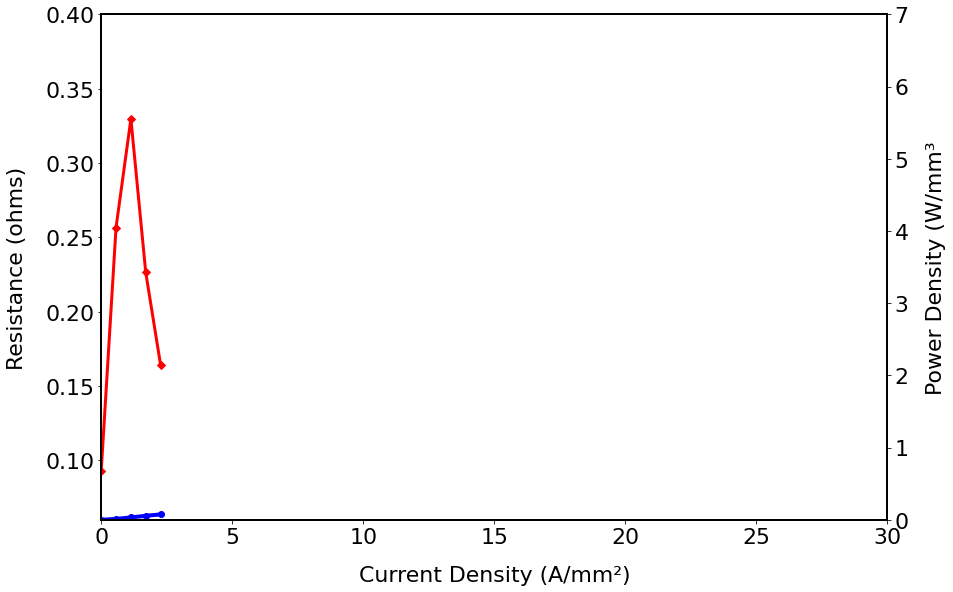

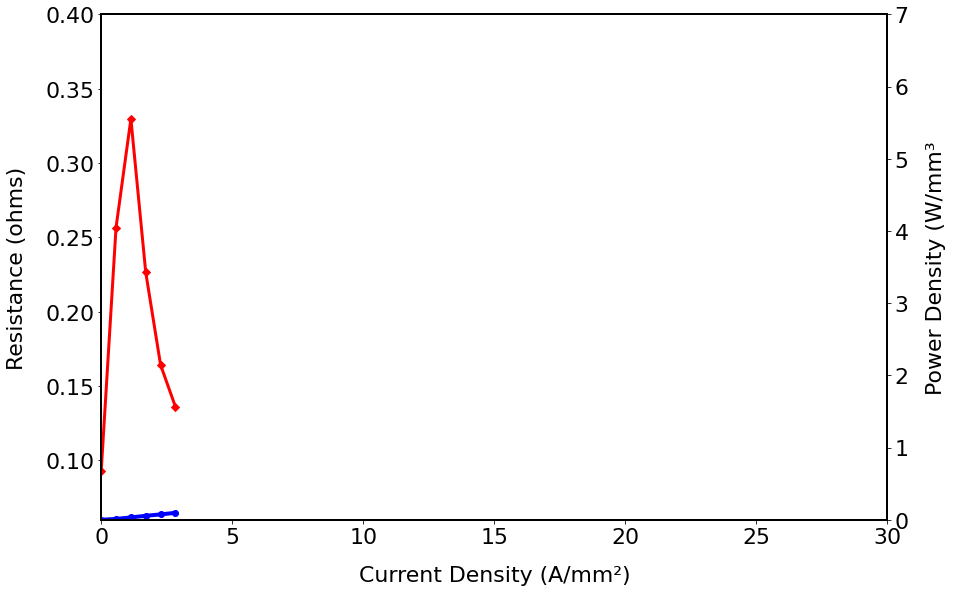

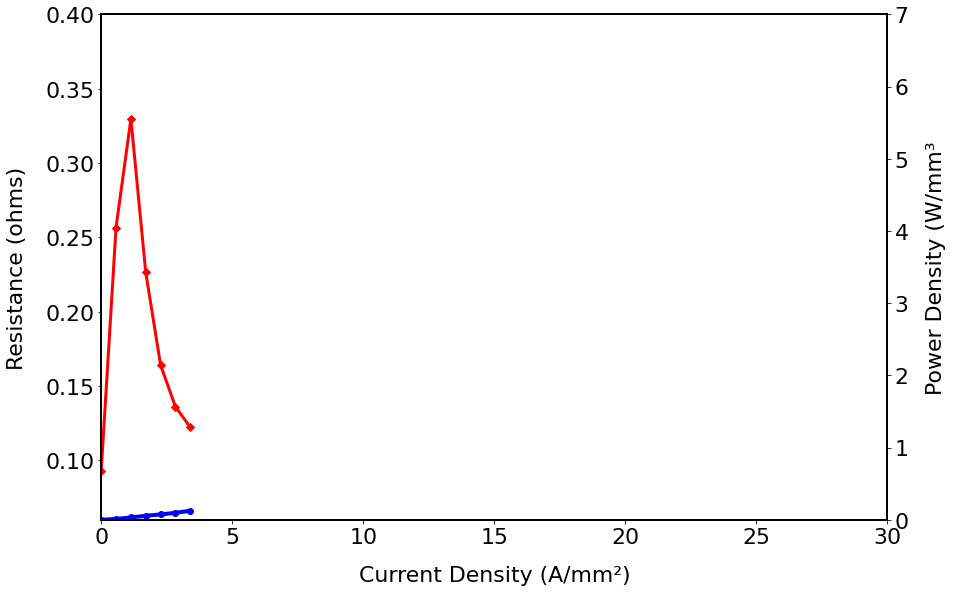

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May  9 16:31:39 2022

@author: emmanuel_bamidele
"""

import os
import matplotlib.font_manager
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter

def loop_directory(directory: str, in_file_format: str, out_file_format:str):
    '''Loop files in the specified directory'''
    
    for filename in os.listdir(directory):
        if filename.endswith(in_file_format):
            file_directory = os.path.join(directory, filename)
            print(file_directory)
            
            column_names = ["Time","Current","Voltage","Current_Density","Temperature","Electric_Field",
                            "Power_Density","Resistance","Conductivity_S","Conductivity_SM",
                            "Conductivity_MSm","BBR_Cal","BBR_Temp"]
            df = pd.read_csv(file_directory, delimiter=",", skiprows = [1])
            df.fillna(0)
            
            xdata1 = df["Current Density"]
            ydata1 = df["Resistance"]
            ydata1_fit = savgol_filter(ydata1, 5, 3, mode="nearest")
            xdata2 = df["Current Density"]
            ydata2 = df["Power Density"]
            ydata2_fit = savgol_filter(ydata2, 5, 3, mode="nearest")
            
            plt.rc('font', family='serif', serif='Times')
            plt.rc('xtick', labelsize=22)
            plt.rc('ytick', labelsize=22)
            plt.rc('axes', labelsize=22)

            plt.rcParams['font.size'] = 22
            plt.rcParams['axes.linewidth'] = 2

            # width as measured in inkscape
            width = 13
            height = width / 1.5

            fig, ax1 = plt.subplots()
            fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
            ax2 = ax1.twinx()
            
            ax1.plot(xdata1, ydata1_fit, color="red", lw=3, marker='D')
            ax2.plot(xdata2, ydata2_fit, color="blue", lw=4, marker='o')

            ax1.set_xlabel('Current Density (A/mm\u00b2)', labelpad=18, fontsize=22)
            ax1.set_ylabel('Resistance (ohms)', labelpad=18, fontsize=22)
            ax2.set_ylabel('Power Density (W/mm\u00b3', labelpad=18, fontsize=22)
            
            ax1.set_xlim(0, 30)
            ax1.set_ylim(0.06, 0.4)
            ax2.set_xlim(0, 30)
            ax2.set_ylim(0, 7)

            fig.set_size_inches(width, height)
            
            results_dir = os.path.join(directory, 'Figures/')
            if not os.path.isdir(results_dir):
                os.makedirs(results_dir)
                
            save_name = filename.rsplit( ".", 1 )[ 0 ] + out_file_format
            plt.savefig(results_dir + save_name, dpi=600, transparent=False, bbox_inches='tight')

            
if __name__ =='__main__':
    loop_directory(directory=r'C:\Users\bamid\Desktop\Phd Data\Video_Sheet\Output',
                  in_file_format = ".csv", out_file_format=".jpeg");